# NHANES Simulations


In this lab, we will continue to use the NHANES data set to explore sampling.

First we import the libraries that we will be using.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os

Now we load the NHANES data from a file.

In [2]:
nhanes = pd.read_csv("nhanes.csv.gz")

### Sampling Processes

Let's use the `sample` method to understand probability, and the differences between sampling *with* and *without* replacement.

We've defined the probability of an event as the ratio of the number of favorable outcomes (those that meet the event criteria) to the total number of possible outcomes. For example, the probability of rolling a 1 on a six-sided die is $\frac{1}{6}$, since there is only one way to roll a 1, and six possible outcomes in total.

In this context, a *random variable* represents the outcomes of a random event as a numerical value. This variable can take different possible values depending on the outcome of the event.

Another way to think about probability is by imagining a large (or even infinite) population. If we take a very large sample from this population, the proportion of observations that meet the event criteria would approximate the probability of the event.

Let’s go through some examples.

To start with, here is a really large population of 6-sided die rolls:

In [3]:
d6 = pd.Series([1, 2, 3, 4, 5, 6]).repeat(1000000)
d6.value_counts()

1    1000000
2    1000000
3    1000000
4    1000000
5    1000000
6    1000000
Name: count, dtype: int64

Use `sample(10000)` to take a sample of size $10000$ from this population. Then, use `value_counts` with the `normalize = True` option  to get proportions of each value.

In [4]:
# Replace this text with your code 

<details>

```
d6.sample(10000).value_counts(normalize = True)
```


</details>

As a reminder, 1/6 = 0.16667. Are we close to 1/6?

*Replace this text with your answer* 

By default, the `sample` method uses *sampling without replacement*, meaning that once we sample a unit from the population, it goes into our sample and cannot be selected again. This approach mimics many real-world sampling processes. However, for very large populations, this is effectively the same as sampling with replacement, where each value is returned to the population after being chosen.

Sampling with replacement also makes it simpler to define our large population. Instead of creating a large population by duplicating values, we can simply define each value in the population once, like this:

In [5]:
d6_faces = pd.Series([1, 2, 3, 4, 5, 6])

Use `sample` with the `replace = True` option to sample from `d6_faces` 10000 times. Compute the proportions of each value in the sample. What do you see?

In [6]:
# Replace this text with your code 

*Replace this text with your answer* 

<details>

```
d6_faces.sample(10000, replace = True).value_counts(normalize = True)
```

</details>

Another way we can explore sampling is through **joint relationships**.

For example, let's consider a simulation in which we roll two six sided dice. We can represent the outcome of the first die with a random variable $X$ and we can represent the outcome of the second die with a random variable $Y$.

Here is a table with all 36 possible rolls of the two six sided dice.

In [7]:
two_d6 = pd.DataFrame([(x, y) for x in d6_faces for y in d6_faces], columns = ["d1", "d2"])
two_d6

,d1,d2
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
5,1,6
6,2,1
7,2,2
8,2,3
9,2,4


Use sampling with replacement to calculate the probability that you

* Roll doubles (i.e. $P(X = Y)$)
* Roll sum of at least 7 (i.e. $P(X + Y \geq 7)$)
* The difference in d1 - d2 is more than one (in absolute value) (i.e. $P(|X-Y| \geq 1)$)

In [8]:
# Replace this text with your code 

<details>

```
s2 = two_d6.sample(10000, replace = True)

p_doubles = (s2['d1'] == s2['d2']).mean()

p_doubles

```

</details>

In [9]:
# Replace this text with your code 

<details>

```
p_plus7 = (s2['d1'] + s2['d2'] >= 7).mean()

p_plus7

```

</details>

In [10]:
# Replace this text with your code 

<details>

```
p_diff_1 = ((s2['d1'] - s2['d2']).abs() > 1).mean()

p_diff_1

```

</details>

#### Simple random samples

Recall *simple random samples* require two necessary components:

1. Being able to sample units one at a time with *uniform probability*.
2. A sufficiently large population so that each unit in our sample is effectively independent of all the others.

Verify that the `nhanes` table is sufficiently large by printing out the number of rows.

In [11]:
# Replace this text with your code 

<details>

```
nhanes.shape[0]
```

</details>

Take a simple random sample of size 20 from this table. Compute the sample mean of the 'BMXHT' column.

In [12]:
# Replace this text with your code 

<details>

```
nhanes.sample(20)['BMXHT'].mean()
```

</details>

Here is a demonstration of taking 10,000 samples, each of size 20, from the `nhanes` table and computing the sample mean of 'BMXHT' for each sample.

In [13]:
nhanes_bmxht_means = pd.Series([nhanes['BMXHT'].sample(20).mean() for _ in range(0, 10000)])

Graph the distribution of the sample means using a KDE plot.

In [14]:
# Replace this text with your code 

<details>

```
sb.kdeplot(x = nhanes_bmxht_means)
```

</details>

Compute the true *population* mean of 'BMXHT' from the `nhanes` table. Using `nhanes_bmxht_means`, compute the *mean of the sample means* to get an approximate expectation of the sample mean. Are they close? Is the sample mean a good estimate of the population mean?

In [15]:
# Replace this text with your code 

*Replace this text with your answer*

<details>

```
(nhanes['BMXHT'].mean(), nhanes_bmxht_means.mean())
```

</details>

### Other Statistics

Repeat the above investigation for the sample median and sample standard deviation. On average, do we get the right answer compared with the population median and standard deviation?

In [16]:
# Replace this text with your code 

<details>

```
nhanes_bmxht_medians = pd.Series([nhanes['BMXHT'].sample(20).median() for _ in range(0, 10000)])

(nhanes['BMXHT'].median(), nhanes_bmxht_medians.mean())

```

</details>

In [17]:
# Replace this text with your code 

<details>

```
nhanes_bmxht_stds = pd.Series([nhanes['BMXHT'].sample(20).std() for _ in range(0, 10000)])

(nhanes['BMXHT'].std(), nhanes_bmxht_stds.mean())

```

</details>

*Replace this text with your answer*

### Biased Sampling

So far we have considered the happy case where we have simple random samples. What about if we had biased sampling? Would we get the wrong answer?

One obvious issue would be if we were more likely to sample people with larger heights. We can simulate this using *weights*, where units from the population with higher weights are more likely to be sampled. In this case, we can make the weights equal to the height measurement itself.

In [18]:
biased_means = pd.Series([nhanes['BMXHT'].sample(20, weights = nhanes['BMXHT']).mean() for _ in range(0, 10000)])

Graph the distribution of these means using a KDE plot. What do you notice?

In [19]:
# Replace this text with your code 

<details>

```
sb.kdeplot(x = biased_means)
```

</details>

*Replace this text with your answer*

Make this more precise by computing the mean of this sampling distribution.

In [20]:
# Replace this text with your code 

<details>

```
biased_means.mean()
```

</details>

Obviously, picking taller people with a higher probability is a pretty egregios violation of uniform sampling. Sometimes, our samples might have more subtle problems.

Here is a plot of height and gender.

<Axes: xlabel='RIAGENDR', ylabel='BMXHT'>

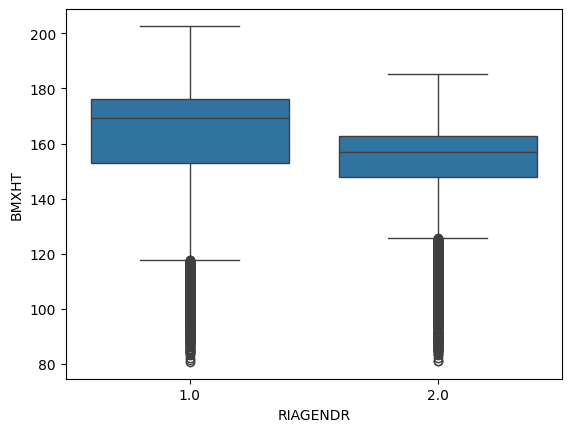

In [21]:
sb.boxplot(data = nhanes, x = "RIAGENDR", y = "BMXHT")

What if we were more likely to recruit men into our survey? Suppose a man was 4 times more likely to be included in the survey, what would happen? Compute the mean of this set of *biased* samples.

In [22]:
more_men = pd.Series([nhanes['BMXHT'].sample(20, weights = 1 + 4 * (nhanes["RIAGENDR"] == 1.0)).mean() for _ in range(0, 10000)])

In [23]:
# Replace this text with your code 

<details>

```
more_men.mean()
```

</details>

*Replace this text with your answer*

As we can see in these examples, when sampling is biased, our sample mean (or other statistics) no longer provides a reliable estimate of the population mean (or other parameters). In this simulation, we observed the impact of bias because we knew the true population mean. In practice, we typically don’t have this knowledge beforehand, which is why avoiding bias is essential in data collection.

When using data from other sources, it’s important to consider the potential for bias. While we may not always be able to identify it, acknowledging and discussing possible biases is an essential ethical responsibility for data scientists.

# Extra Problems

## Problem 1

Consider a fair 4-sided die with the faces 1, 2, 2, and 3. What is the probability that you would observe the value 2?

*Replace this text with your solution*

<details>

```
There are two "2" values out of 4 total values, so $P(D = 2) = 2/4 = 1/2$.
```

</details>

Suppose you rolled the die twice and added the values together $S = D_1 + D_2$. What is the probability of seeing a sum equal to 4?

*Replace this text with your solution*

<details>

```
Here is a table of the 16 possible outcomes/values:

|. | $D_1 = 1$ | $D_1 = 2$ | $D_1 = 2$ | $D_1 = 3$ |
|------|-----|-----|-----|----|
| $D_2 = 1$ | 2 | 3 | 3 | 4 |
| $D_2 = 2$ | 3 | 4 | 4 | 5 |
| $D_2 = 2$ | 3 | 4 | 4 | 5 |
| $D_3 = 3  | 4 | 5 | 5 | 6 |

There are 6 out of 16 possible outcomes, so a probability of 3/8.
```

</details>

What is the probability that $S \ge 5$?

*Replace this text with your solution*

<details>

```
One can use the table to see, that this probability equals to 5/16 (four 5s, and one 6).
```

</details>

Suppose you are told $D_1 = 2$, what is the **conditional probability** that $S = 5$?

*Replace this text with your solution*

<details>

```
$D_1 = 2$, the sum can be $3, 4, 4$, or $5$. There 1/4 probabilty $S = 5$.
```
</details>

## Problem 2
Consider a random variable with the following properties:

* $P(X = 1) = 1/2$
* $P(X = 2) = 1/4$
* $P(X = 4) = 1/8$
* $P(X = 8) = 1/8$

What is the probability of the event that $X = 1$ or $X = 8$?

*Replace this text with your solution*

<details>

```
If we think about 8 outcomes, 4 of them have the value 1 and one has the value 8. So 5 out of 8 are either 1 or 8. $P(X = 1 \text{ or } X= 8) =5/8$.

```
</details>

What is the expected value of $X$? (also known as the mean of $X$)

*Replace this text with your solution*

<details>
```
We can update the above result by dividing each value by 2:
1/2 * 1/2 + 1/4 * 2/2 + 1/8 * 4/2 + 1/8 * 8/2
or just take or previous answer and divide by 2:
2.5/2
```
</details>

What is the variance of $X$? 

$Var(X) = E[(X - E(X))^2]$

*Replace this text with your solution*

<details>

```
One can update the previous step:
1/2 * (1 - 2.5)**2 + 1/4 * (2 - 2.5)**2 + 1/8 * (4 - 2.5)**2 + 1/8 * (8 - 2.5)**2
```

</details>

## Problem 3

Suppose that the pair of random variables $(X, Y)$ have the following distribution:

* P(X = 0, Y = 0) = 1/4
* P(X = 1, Y = 0) = 1/2
* P(X = 0, Y = 1) = 1/8
* P(X = 1, Y = 1) = 1/8

Write down the 8 outcomes that you might observe for $X$ and $Y$ that would be consistent with this information.

*Replace this text with your solution*

<details>

```
**Answer**:

* (0, 0)
* (0, 0)
* (1, 0)
* (1, 0)
* (1, 0)
* (1, 0)
* (0, 1)
* (1, 1)
```
</details>

Use the previous result to find the distribution of $X$ all by itself. Namely, what is $P(X = 0)$ and what is $P(X = 1)$?

*Replace this text with your solution*

<details>

```
**Answer**: We see that X = 1 in 5 of the 8 outcomes. $P(X = 1) = 5/8$ and $P(X = 0) = 3/8$.
```
</details>

Calculate the conditional distribution of $X \mid Y = 0$ (i.e., $P(X = 0 \mid Y = 0)$ and $P(X = 1 \mid Y = 1)$.

*Replace this text with your solution*

<details>

```
**Answer**: Out of the 6 outcomes where $Y = 0$, $X = 0$ in two of them and $X = 1$ in 4 of them. So

* $P(X = 0 \mid Y = 0) = 1/3$
* $P(X = 1 \mid Y = 0) = 2/3$
```
</details>

Using these results, would you say that $X$ and $Y$ are **independent**? Why or why not?

*Replace this text with your solution*

<details>
    
```
**Answer**: Not independent because the $P(X = 1) = 5/8 \ne P(X = 1 \mid Y = 0)
= 2/3$.
```

</details>
